# ***BIG DATA - 1st Hypothesis***
***ANSA BABY    -  22540050***

Hypothesis : In 2014, people ride for longer in Autumn than in Spring

1.   Null Hypothesis (H0): In 2014, people rode for longer in the autumn than in the spring.
2.   Alternative Hypothesis (H1): In 2014, people do not ride for as long in the autumn as they do in the spring.

# **1.** *Instal the Spark Apache and its libraries*


In [1]:
# check if this instance of the notebook already has files present
# and thus determine which steps required prior to reading in file and handling the data
!ls

#install spark latest version
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget https://downloads.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
!tar -xf spark-3.3.2-bin-hadoop3.tgz


sample_data
--2023-05-25 19:27:09--  https://downloads.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
Resolving downloads.apache.org (downloads.apache.org)... 135.181.214.104, 88.99.95.219, 2a01:4f9:3a:2c57::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|135.181.214.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 299360284 (285M) [application/x-gzip]
Saving to: ‘spark-3.3.2-bin-hadoop3.tgz’

spark-3.3.2-bin-had 100%[===================>] 285.49M  25.9MB/s    in 12s     

2023-05-25 19:27:21 (24.0 MB/s) - ‘spark-3.3.2-bin-hadoop3.tgz’ saved [299360284/299360284]



In [2]:
#instal findspark 
!pip3 install findspark
import os

# set the necessary environment variables for Java and Spark
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.2-bin-hadoop3"

#import and initialize findspark
import findspark
findspark.init()

#Import the required modules from PySpark:
from pyspark import SparkConf, SparkContext
spark_conf = SparkConf().setMaster('local[2]').setAppName('MyApp')

#Set up the Spark configuration and context:
sc = SparkContext(conf=spark_conf)
from pyspark.sql import *
from pyspark.sql.functions import *

#create a SparkSession
spark = SparkSession.builder.appName("bikes").getOrCreate()


# import Python libs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from pyspark.sql.functions import col
import numpy as np
from pyspark.sql.functions import col, sum

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Download and unzip the data for 1st hypothesis
!wget https://cycling.data.tfl.gov.uk/usage-stats/cyclehireusagestats-2014.zip
!unzip cyclehireusagestats-2014.zip

--2023-05-25 19:28:10--  https://cycling.data.tfl.gov.uk/usage-stats/cyclehireusagestats-2014.zip
Resolving cycling.data.tfl.gov.uk (cycling.data.tfl.gov.uk)... 104.16.100.13, 104.16.101.13
Connecting to cycling.data.tfl.gov.uk (cycling.data.tfl.gov.uk)|104.16.100.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 225215129 (215M) [application/zip]
Saving to: ‘cyclehireusagestats-2014.zip’

cyclehireusagestats 100%[===================>] 214.78M   165MB/s    in 1.3s    

2023-05-25 19:28:12 (165 MB/s) - ‘cyclehireusagestats-2014.zip’ saved [225215129/225215129]

Archive:  cyclehireusagestats-2014.zip
  inflating: 1. Journey Data Extract 05Jan14-02Feb14.csv  
  inflating: 10a. Journey Data Extract 14Sep14-27Sep14.csv  
  inflating: 10b. Journey Data Extract 28Sep14-11Oct14.csv  
  inflating: 11a. Journey Data Extract 12Oct14-08Nov14.csv  
  inflating: 11b. Journey Data Extract 12Oct14-08Nov14.csv  
  inflating: 12a. Journey Data Extract 09Nov14-06Dec14.csv  
  i

# **2.** *Data Extraction*

The dataset contains Data from Jan - Dec 2014. We need to load the data which are relevant to our hypothesis.  Our hypothesis need data for Spring and Autumn.

## Extract Spring & Autumn data from whole dataset. 

  
Astronomical spring is defined from Thu, Mar 20, 2014  to Sat, Jun 21, 2014. 
(UK Met-Offie - https://www.metoffice.gov.uk/weather/learn-about/weather/seasons/spring/when-does-spring-start)

In [5]:
# The spring data extracted from multiple files from the dataset. 
# 3. Journey Data Extract 02Mar14-31Mar14.csv  (Need to remove the extra data , which are not in spring date - 02 -19 March)
# 4. Journey Data Extract 01Apr14-26Apr14.csv
# 5. Journey Data Extract 27Apr14-24May14.csv
# 6. Journey Data Extract 25May14-21Jun14.csv

spring_df = (spark.read.format("csv")
         .option("header", "true")
         .option("inferSchema", "true")
           .load(["/content/3. Journey Data Extract 02Mar14-31Mar14.csv", "/content/4. Journey Data Extract 01Apr14-26Apr14.csv",
                  "/content/5. Journey Data Extract 27Apr14-24May14.csv", "/content/6. Journey Data Extract 25May14-21Jun14.csv"]))

UK Met Office says the Autumn started at Friday, 23 September 2014 and ended at Wednesday, 21 December 2014. Will extract these data from the whole dataset.  (https://www.metoffice.gov.uk/weather/learn-about/weather/seasons/autumn/when-does-autumn-start)

In [6]:
# The Autumn data extracted from multiple files from the dataset. (23 sep - 21 Dec)

# 10a. Journey Data Extract 14Sep14-27Sep14.csv  (Need to remove the extra data , which are not in autumn date - 14- 20th Sep )
# 10b. Journey Data Extract 28Sep14-11Oct14.csv
# 11a. Journey Data Extract 12Oct14-08Nov14.csv
# 11b. Journey Data Extract 12Oct14-08Nov14.csv
# 12a. Journey Data Extract 09Nov14-06Dec14.csv
# 12b. Journey Data Extract 09Nov14-06Dec14.csv
# 13a. Journey Data Extract 07Dec14-21Dec14.csv

autumn_df = (spark.read.format("csv")
         .option("header", "true")
         .option("inferSchema", "true")
         .load(['/content/10a. Journey Data Extract 14Sep14-27Sep14.csv', '/content/10b. Journey Data Extract 28Sep14-11Oct14.csv',
                '/content/11a. Journey Data Extract 12Oct14-08Nov14.csv', '/content/11b. Journey Data Extract 12Oct14-08Nov14.csv', 
                '/content/12a. Journey Data Extract 09Nov14-06Dec14.csv', '/content/12b. Journey Data Extract 09Nov14-06Dec14.csv', 
                '/content/13a. Journey Data Extract 07Dec14-21Dec14.csv' ]))

In [7]:
spring_df

DataFrame[Rental Id: string, Duration: string, Bike Id: string, End Date: string, EndStation Id: string, EndStation Name: string, Start Date: string, StartStation Id: string, StartStation Name: string, _c9: string, _c10: string, _c11: string]

In [8]:
autumn_df

DataFrame[Rental Id: string, Duration: string, Bike Id: string, End Date: string, EndStation Id: string, EndStation Name: string, Start Date: string, StartStation Id: string, StartStation Name: string, _c9: string, _c10: string, _c11: string]

# **3.** *Data Cleaning*

In [9]:
# Remove unwanted rows , ie not in Spring & Autumn dates
# Remove any unwanted columns

## Data cleaning in Spring data

In [10]:
spring_df.show(10)

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----+----+----+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name| _c9|_c10|_c11|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----+----+----+
| 33253206|    1140|  11439|27/05/2014 00:59|          695|Islington Green, ...|27/05/2014 00:40|             81|Great Titchfield ...|null|null|null|
| 33345935|     660|  10792|30/05/2014 18:00|          326|Graham Street, Angel|30/05/2014 17:49|            203|West Smithfield R...|null|null|null|
| 33480171|    1440|  11901|03/06/2014 13:29|          695|Islington Green, ...|03/06/2014 13:05|            239|Warren Street Sta...|null|null|null|
| 33709780|     960|   6891|09/06/2014 18:31|           20|Drummond Street ,...|09/06/2014 18:15|   

In [11]:
spring_df.count()

3146046

In [12]:
# Print the data schema
spring_df.printSchema()

root
 |-- Rental Id: string (nullable = true)
 |-- Duration: string (nullable = true)
 |-- Bike Id: string (nullable = true)
 |-- End Date: string (nullable = true)
 |-- EndStation Id: string (nullable = true)
 |-- EndStation Name: string (nullable = true)
 |-- Start Date: string (nullable = true)
 |-- StartStation Id: string (nullable = true)
 |-- StartStation Name: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)



In [13]:
for column in spring_df.columns:
    null_count = spring_df.where(col(column).isNull()).count()
    print(f"Column '{column}' has {null_count} null values.")

Column 'Rental Id' has 0 null values.
Column 'Duration' has 0 null values.
Column 'Bike Id' has 0 null values.
Column 'End Date' has 0 null values.
Column 'EndStation Id' has 28 null values.
Column 'EndStation Name' has 28 null values.
Column 'Start Date' has 0 null values.
Column 'StartStation Id' has 0 null values.
Column 'StartStation Name' has 0 null values.
Column '_c9' has 3146046 null values.
Column '_c10' has 3146046 null values.
Column '_c11' has 3146046 null values.


In [14]:
#remove the - non spring data , unwanted columns  & Null Columns from the df
timestamped_df = spring_df.select(to_timestamp(col("Start Date"), format="dd/MM/yyyy HH:mm").alias("start_date"),"Rental Id","Duration","Bike Id","StartStation Name")
spring_df = timestamped_df.filter(timestamped_df.start_date > "2014-03-19 23:59:59")
spring_df.count()

2691350

In [15]:
spring_df.printSchema()

root
 |-- start_date: timestamp (nullable = true)
 |-- Rental Id: string (nullable = true)
 |-- Duration: string (nullable = true)
 |-- Bike Id: string (nullable = true)
 |-- StartStation Name: string (nullable = true)



In [16]:
from pyspark.sql.functions import min, max
spring_df.agg(min("start_date"), max("start_date")).show()

+-------------------+-------------------+
|    min(start_date)|    max(start_date)|
+-------------------+-------------------+
|2014-03-20 00:00:00|2014-06-21 23:59:00|
+-------------------+-------------------+



Above Min and Max values shows that the data contains only the spring data

## Data Cleaning in Autumn data

In [17]:
autumn_df.count()

3114128

In [18]:
# Printing the schema
autumn_df.printSchema()

root
 |-- Rental Id: string (nullable = true)
 |-- Duration: string (nullable = true)
 |-- Bike Id: string (nullable = true)
 |-- End Date: string (nullable = true)
 |-- EndStation Id: string (nullable = true)
 |-- EndStation Name: string (nullable = true)
 |-- Start Date: string (nullable = true)
 |-- StartStation Id: string (nullable = true)
 |-- StartStation Name: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)



In [19]:
for column in autumn_df.columns:
    null_count = autumn_df.where(col(column).isNull()).count()
    print(f"Column '{column}' has {null_count} null values.")

Column 'Rental Id' has 488627 null values.
Column 'Duration' has 488627 null values.
Column 'Bike Id' has 488627 null values.
Column 'End Date' has 488627 null values.
Column 'EndStation Id' has 488657 null values.
Column 'EndStation Name' has 488657 null values.
Column 'Start Date' has 488627 null values.
Column 'StartStation Id' has 488627 null values.
Column 'StartStation Name' has 488627 null values.
Column '_c9' has 3114128 null values.
Column '_c10' has 3114128 null values.
Column '_c11' has 3114128 null values.


In [20]:
#remove the - non spring data , unwanted columns  & Null Columns from the df
timestamped_df = autumn_df.select(to_timestamp(col("Start Date"), format="dd/MM/yyyy HH:mm").alias("start_date"),"Rental Id","Duration","Bike Id","StartStation Name")
autumn_df = timestamped_df.filter(timestamped_df.start_date > "2014-09-22 23:59:59")
autumn_df.count()

2309906

In [21]:
autumn_df.printSchema()

root
 |-- start_date: timestamp (nullable = true)
 |-- Rental Id: string (nullable = true)
 |-- Duration: string (nullable = true)
 |-- Bike Id: string (nullable = true)
 |-- StartStation Name: string (nullable = true)



In [22]:
autumn_df.agg(min("start_date"), max("start_date")).show()

+-------------------+-------------------+
|    min(start_date)|    max(start_date)|
+-------------------+-------------------+
|2014-09-23 00:00:00|2014-12-21 23:59:00|
+-------------------+-------------------+



Above Min and Max values shows that the data contains only the autumn data

# **4.** *Exploratory Data Analysis*

Check for missing data

In [23]:
# Converting Duration to numerical feature
spring_df = spring_df.withColumn("Duration", col("Duration").cast("float"))
autumn_df = autumn_df.withColumn("Duration", col("Duration").cast("float"))

In [24]:
missing_counts = spring_df.select([sum(col(c).isNull().cast("int")).alias(c) for c in spring_df.columns])
missing_counts.show()

+----------+---------+--------+-------+-----------------+
|start_date|Rental Id|Duration|Bike Id|StartStation Name|
+----------+---------+--------+-------+-----------------+
|         0|        0|       0|      0|                0|
+----------+---------+--------+-------+-----------------+



In [25]:
missing_counts = autumn_df.select([sum(col(c).isNull().cast("int")).alias(c) for c in autumn_df.columns])
missing_counts.show()

+----------+---------+--------+-------+-----------------+
|start_date|Rental Id|Duration|Bike Id|StartStation Name|
+----------+---------+--------+-------+-----------------+
|         0|        0|       0|      0|                0|
+----------+---------+--------+-------+-----------------+



In [26]:
# No Missing data in the refined dataset - for both spring and autumn

## Check for outliers

In [27]:
#Check duration outliers in autumn data
column_name = "Duration"
summary_stats = autumn_df.select(column_name).summary()
summary_stats.show()

+-------+------------------+
|summary|          Duration|
+-------+------------------+
|  count|           2309906|
|   mean|1305.4893575755896|
| stddev|13151.840663325927|
|    min|           -3360.0|
|    25%|             480.0|
|    50%|             780.0|
|    75%|            1200.0|
|    max|         2460120.0|
+-------+------------------+



We can make the following observations about outliers based on these summary statistics:


*   Outliers in the lower range: The minimum value of -3,360.0 may represent some negative or invalid durations. 

*   Outliers in the upper range: When compared to the other durations, the maximum duration of 2,460,120.0 appears to be an extreme outlier. 

In [28]:
#Check duration outliers in spring data
column_name = "Duration"
summary_stats = spring_df.select(column_name).summary()
summary_stats.show()

+-------+------------------+
|summary|          Duration|
+-------+------------------+
|  count|           2691350|
|   mean|1522.0841287829528|
| stddev|12419.837723296101|
|    min|               0.0|
|    25%|             480.0|
|    50%|             840.0|
|    75%|            1380.0|
|    max|         2564700.0|
+-------+------------------+



We can make the following observations about outliers based on these summary statistics:



*   Lower-range outliers include: The presence of zero-duration rides (minimum value of 0.0).

*   Outliers in the upper range: Because the maximum duration of 2,564,700.0 is significantly longer than the other durations, it may be considered an outlier.

In [29]:
column_name = "Duration"

# Calculate z-score for each value in the column
mean_value = spring_df.selectExpr(f"avg({column_name})").collect()[0][0]
std_dev_value = spring_df.selectExpr(f"stddev({column_name})").collect()[0][0]
threshold = 3  # Adjust the threshold as needed
lower_bound = mean_value - threshold * std_dev_value
upper_bound = mean_value + threshold * std_dev_value
print(lower_bound)
print(upper_bound)

-35737.42904110535
38781.59729867126


In [30]:
# Identify outliers by filtering the DataFrame
outliers = spring_df.filter((col(column_name) < lower_bound) | (col(column_name) > upper_bound))
outliers.show()

+-------------------+---------+---------+-------+--------------------+
|         start_date|Rental Id| Duration|Bike Id|   StartStation Name|
+-------------------+---------+---------+-------+--------------------+
|2014-06-16 20:10:00| 33980085|  43620.0|   9912|Turquoise Island,...|
|2014-06-09 19:05:00| 33712595|  48660.0|  12517|Brushfield Street...|
|2014-06-17 13:48:00| 33999732| 166560.0|   4657|Black Lion Gate, ...|
|2014-06-13 23:37:00| 33884309| 243660.0|  10919|Bermondsey Street...|
|2014-05-31 06:47:00| 33358749|  38880.0|  10518|St. John's Road, ...|
|2014-06-11 10:56:00| 33772054| 723540.0|   7420|Sedding Street, S...|
|2014-06-19 21:43:00| 34095491|  57120.0|   6413|Broadwick Street,...|
|2014-05-29 18:10:00| 33314115| 582300.0|   7571|Portland Place, M...|
|2014-05-31 16:42:00| 33380001| 320880.0|   2192|Belvedere Road, S...|
|2014-06-15 06:20:00| 33923436|  46620.0|  11297|Hartington Road, ...|
|2014-06-09 06:31:00| 33682185| 205980.0|   1603|Bermondsey Street...|
|2014-

In [31]:
column_name = "Duration"

# Calculate z-score for each value in the column
mean_value = autumn_df.selectExpr(f"avg({column_name})").collect()[0][0]
std_dev_value = autumn_df.selectExpr(f"stddev({column_name})").collect()[0][0]
threshold = 3  # Adjust the threshold as needed
lower_bound = mean_value - threshold * std_dev_value
upper_bound = mean_value + threshold * std_dev_value
print(lower_bound)
print(upper_bound)

-38150.03263240219
40761.01134755337


In [32]:
# Identify outliers by filtering the DataFrame
outliers = autumn_df.filter((col(column_name) < lower_bound) | (col(column_name) > upper_bound))
outliers.show()

+-------------------+---------+---------+-------+--------------------+
|         start_date|Rental Id| Duration|Bike Id|   StartStation Name|
+-------------------+---------+---------+-------+--------------------+
|2014-09-28 00:02:00| 37875893|  60600.0|   1353|Pall Mall East, W...|
|2014-09-28 00:11:00| 37876066| 726840.0|   8324|   The Vale, Chelsea|
|2014-09-28 00:23:00| 37876269|1173420.0|  11507|Silverthorne Road...|
|2014-09-28 00:24:00| 37876272|  72240.0|  12412|Silverthorne Road...|
|2014-09-28 00:28:00| 37876352|  44460.0|    665|   The Vale, Chelsea|
|2014-09-28 00:43:00| 37876590|  51840.0|   5821|Newton Street, Co...|
|2014-09-28 01:15:00| 37877047|  45180.0|    206|Stamford Street, ...|
|2014-09-28 01:24:00| 37877220|  44520.0|  12182|Eel Brook Common,...|
|2014-09-28 01:25:00| 37877231|  72000.0|   5744|Pall Mall East, W...|
|2014-09-28 01:31:00| 37877322|  42000.0|   8792|Elizabeth Bridge,...|
|2014-09-28 01:37:00| 37877412| 384660.0|   9851|Sidney Street, St...|
|2014-

In [33]:
spring_df.agg({"Duration": "mean"}).show()
autumn_df.agg({"Duration": "mean"}).show()

+------------------+
|     avg(Duration)|
+------------------+
|1522.0841287829528|
+------------------+

+------------------+
|     avg(Duration)|
+------------------+
|1305.4893575755896|
+------------------+



In [34]:
# From the summary and average it is clear that the spring duration is more and frequent than Autumn 

In [35]:
# The Summary statistics and z-score outliers shows that the data contains significant amount of outliers that should be taken care.

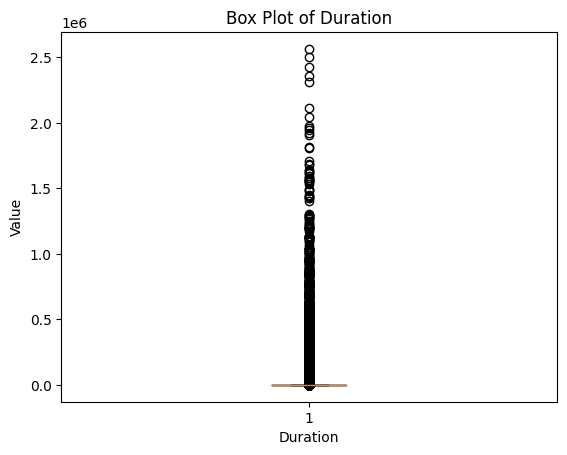

In [36]:
#Box  Plot
import matplotlib.pyplot as plt
duration_data = spring_df.select("Duration").toPandas()

plt.boxplot(duration_data)
plt.xlabel("Duration")
plt.ylabel("Value")
plt.title("Box Plot of Duration")
plt.show()


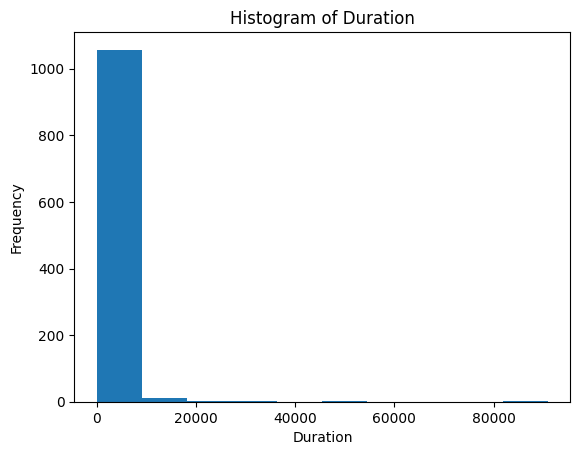

In [37]:
#Histogram  Plot
import matplotlib.pyplot as plt
sample_size = 1000  # Specify the desired sample size
duration_data = spring_df.select("Duration").sample(False, sample_size/spring_df.count()).toPandas()


plt.hist(duration_data, bins=10)
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.title("Histogram of Duration")
plt.show()


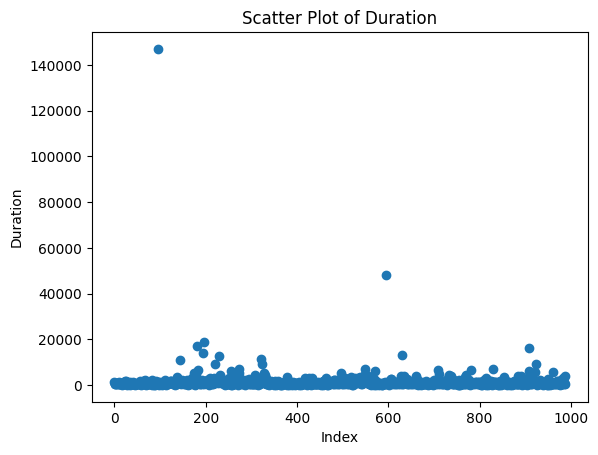

In [38]:
#Scatter  Plot
import matplotlib.pyplot as plt

sample_size = 1000 
duration_data = spring_df.select("Duration").sample(False, sample_size/spring_df.count()).toPandas()

plt.scatter(range(len(duration_data)), duration_data)
plt.xlabel("Index")
plt.ylabel("Duration")
plt.title("Scatter Plot of Duration")
plt.show()


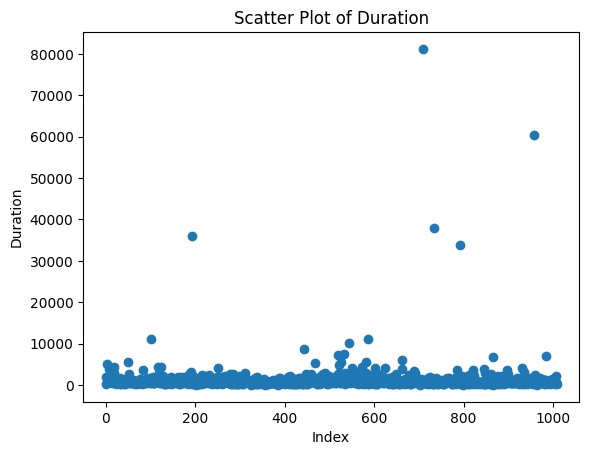

In [39]:
#Scatter  Plot
import matplotlib.pyplot as plt

sample_size = 1000  # Specify the desired sample size
duration_data = autumn_df.select("Duration").sample(False, sample_size/autumn_df.count()).toPandas()

plt.scatter(range(len(duration_data)), duration_data)
plt.xlabel("Index")
plt.ylabel("Duration")
plt.title("Scatter Plot of Duration")
plt.show()


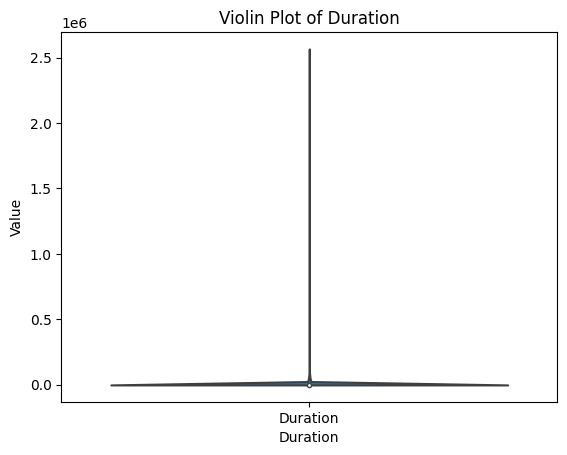

In [40]:
#Violin Plot
import seaborn as sns
duration_data = spring_df.select("Duration").toPandas()
sns.violinplot(data=duration_data)
plt.xlabel("Duration")
plt.ylabel("Value")
plt.title("Violin Plot of Duration")
plt.show()


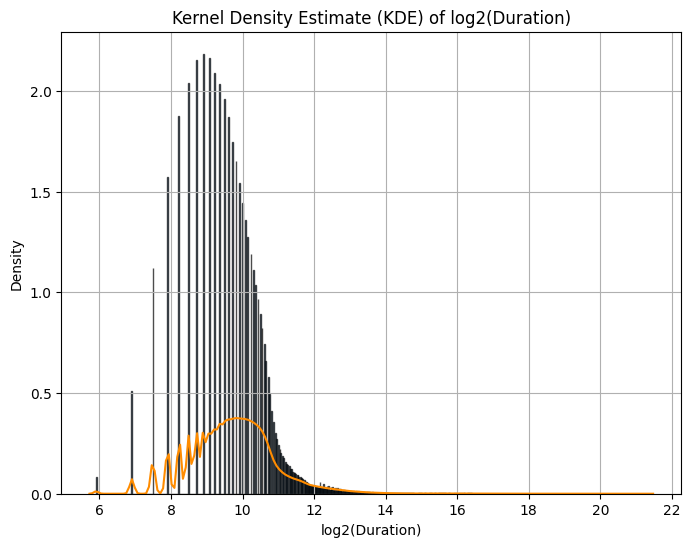

In [41]:
# Plot the KDE using a histogram with a Gaussian kernel
duration_data = spring_df.filter(col('Duration') > 0).select('Duration').rdd.flatMap(lambda x: x).collect()
duration_data_log2 = np.log2(duration_data)

plt.figure(figsize=(8, 6))
plt.title('Kernel Density Estimate (KDE) of log2(Duration)')
plt.xlabel('log2(Duration)')
plt.ylabel('Density')
plt.grid(True)

# Plot the KDE using a histogram with a Gaussian kernel
plt.hist(duration_data_log2, bins='auto', density=True, color='steelblue', alpha=0.7, edgecolor='black')

# Add a kernel density estimate line
sns.kdeplot(duration_data_log2, color='darkorange')

plt.show()

In [42]:
##here the outliers are clearly visible from the KDE plot, ie the values less than 2^7 and 2^14 -  
# ie the actual spring duration is from <128 minutes to ~  10000  ( I took 2^12 first which felt very less, 2^ 14 is very high and again had outliers, so reduced the upper bound to 10000)

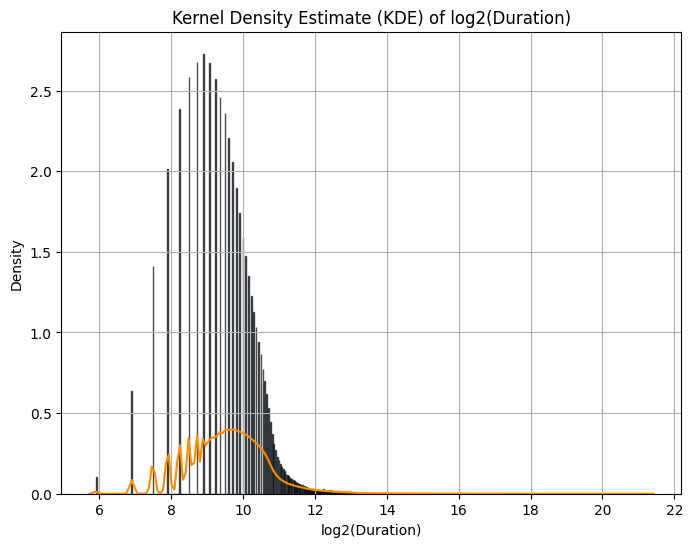

In [43]:
duration_data = autumn_df.filter(col('Duration') > 0).select('Duration').rdd.flatMap(lambda x: x).collect()
duration_data_log2_autmn = np.log2(duration_data)

plt.figure(figsize=(8, 6))
plt.title('Kernel Density Estimate (KDE) of log2(Duration)')
plt.xlabel('log2(Duration)')
plt.ylabel('Density')
plt.grid(True)

# Plot the KDE using a histogram with a Gaussian kernel
plt.hist(duration_data_log2_autmn, bins='auto', density=True, color='steelblue', alpha=0.7, edgecolor='black')

# Add a kernel density estimate line
sns.kdeplot(duration_data_log2_autmn, color='darkorange')

plt.show()

In [44]:
##here the outliers are clearly visible from the KDE plot, ie the values less than 2^7 and 2^14 -  
# ie the actual spring duration is from <128 minutes to ~ 10000  ( I took 2^12 first which felt very less, 2^ 14 is very high and again had outliers, so reduced the upper bound to 10000)

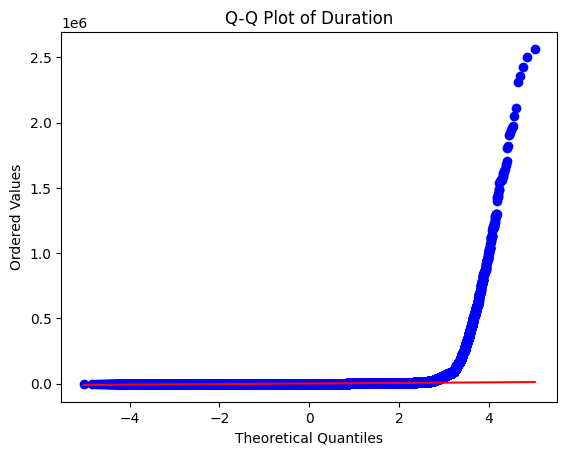

In [45]:
duration_data = spring_df.select("Duration").toPandas()

stats.probplot(duration_data["Duration"], dist="norm", plot=plt)
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Ordered Values")
plt.title("Q-Q Plot of Duration")
plt.show()


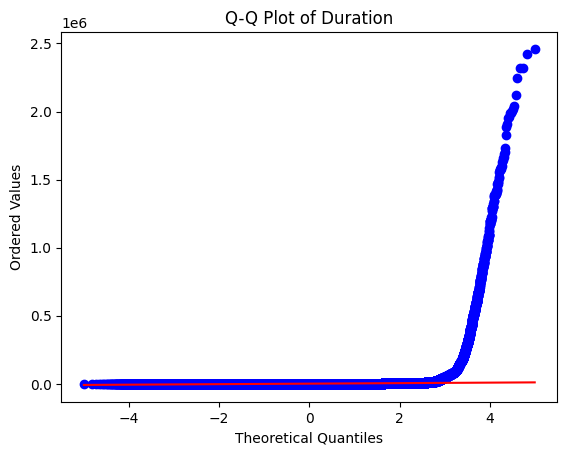

In [46]:
duration_data = autumn_df.select("Duration").toPandas()

stats.probplot(duration_data["Duration"], dist="norm", plot=plt)
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Ordered Values")
plt.title("Q-Q Plot of Duration")
plt.show()

## Remove Outliers

In [47]:
spring_df_f = spring_df.filter("Duration >= 128").filter("Duration <= 10000")[["Duration"]]
spring_df_f.count()

2626339

In [48]:
 
autumn_df_f = autumn_df.filter("Duration >= 128").filter("Duration <= 10000")[["Duration"]]
autumn_df_f.count() 

2257128

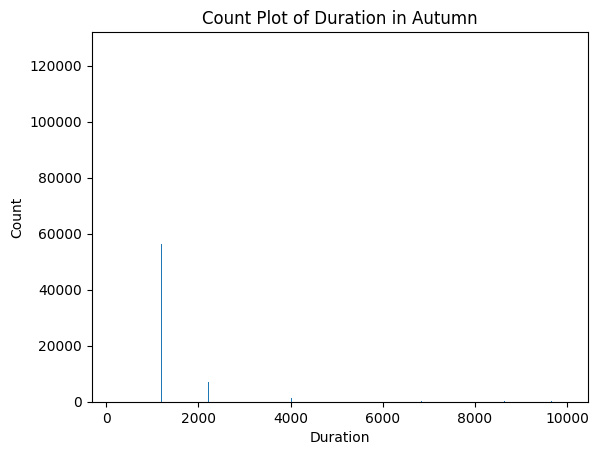

In [49]:
duration_counts = autumn_df_f.groupBy("Duration").count().orderBy("Duration").toPandas()

plt.bar(duration_counts["Duration"], duration_counts["count"])
plt.xlabel("Duration")
plt.ylabel("Count")
plt.title("Count Plot of Duration in Autumn")
plt.show()


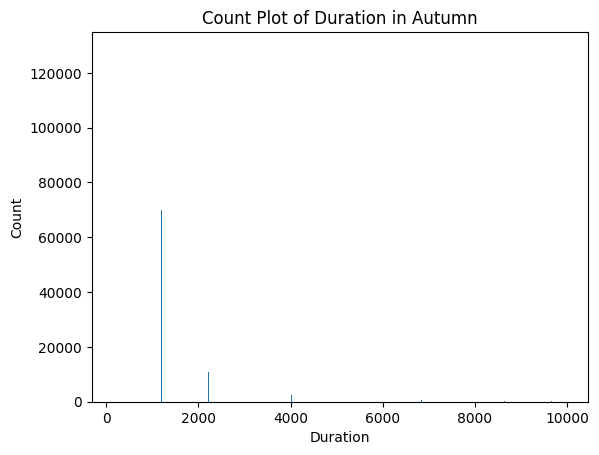

In [50]:
duration_counts = spring_df_f.groupBy("Duration").count().orderBy("Duration").toPandas()

plt.bar(duration_counts["Duration"], duration_counts["count"])
plt.xlabel("Duration")
plt.ylabel("Count")
plt.title("Count Plot of Duration in Autumn")
plt.show()

<Figure size 2000x1000 with 0 Axes>

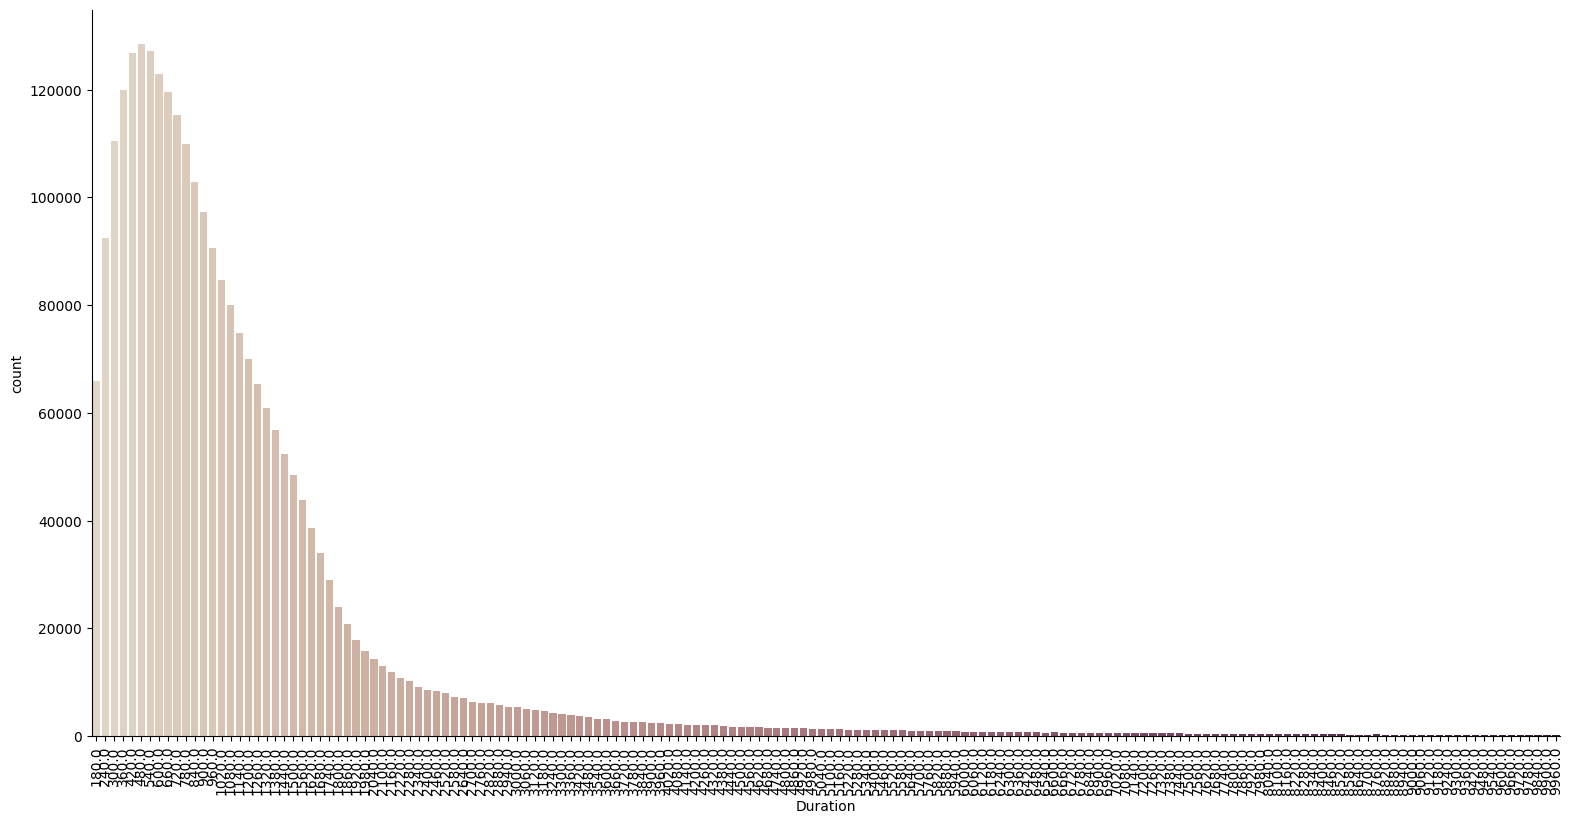

In [51]:
var = "Duration"

# Convert the PySpark DataFrame to a Pandas DataFrame
df_pd = spring_df_f.select(var).toPandas()

plt.figure(figsize=(20, 10))
sns.catplot(x=var, kind="count", palette="ch:.25", height=8, aspect=2, data=df_pd)
plt.xticks(rotation=90)

plt.show()


<Figure size 2000x1000 with 0 Axes>

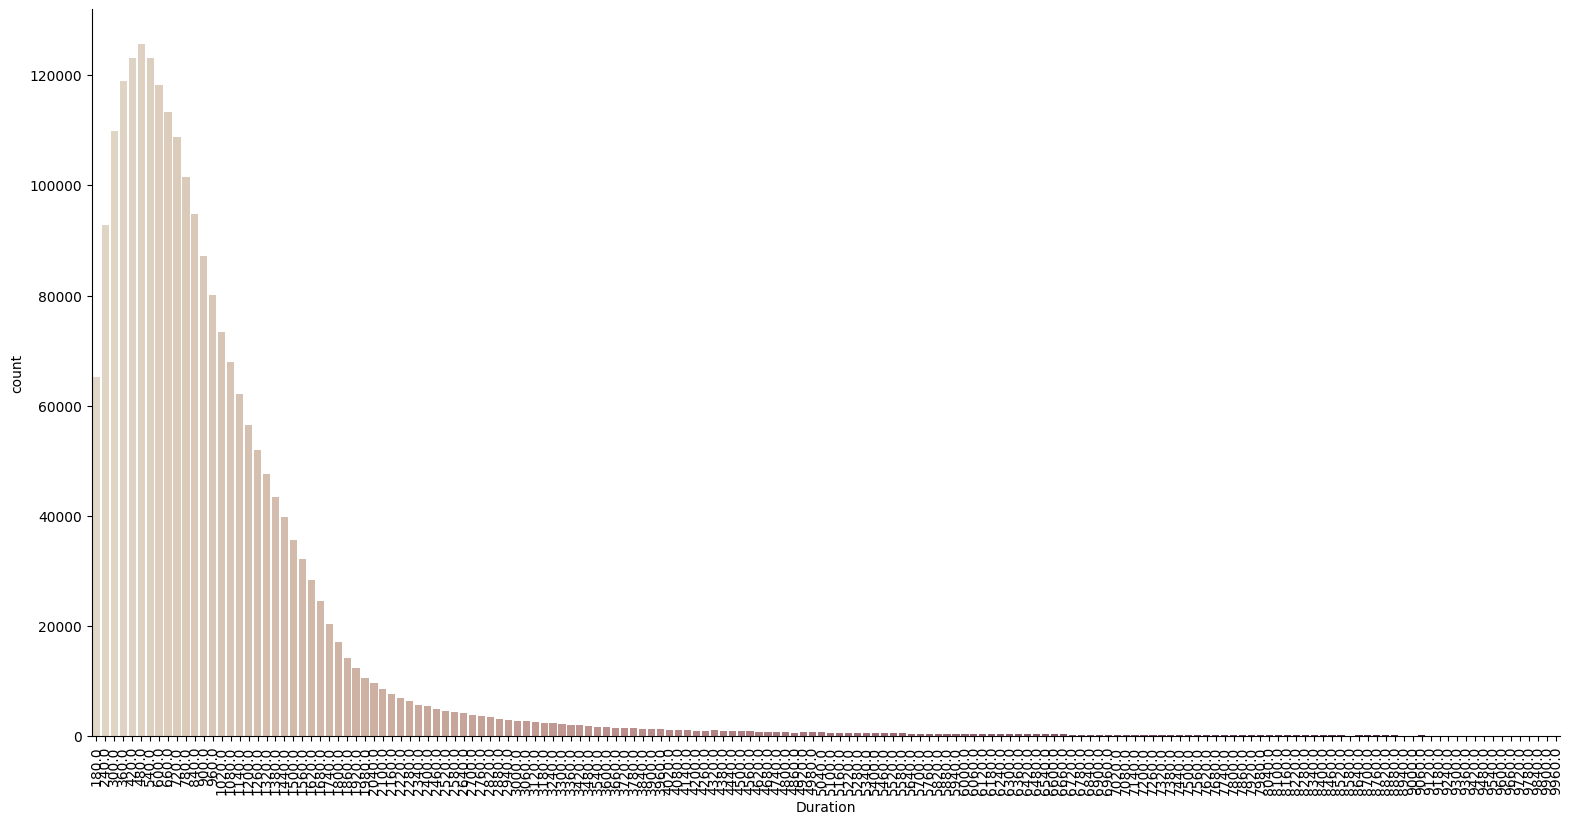

In [52]:
var = "Duration"

# Convert the PySpark DataFrame to a Pandas DataFrame
df_pd = autumn_df_f.select(var).toPandas()

plt.figure(figsize=(20, 10))
sns.catplot(x=var, kind="count", palette="ch:.25", height=8, aspect=2, data=df_pd)
plt.xticks(rotation=90)

plt.show()


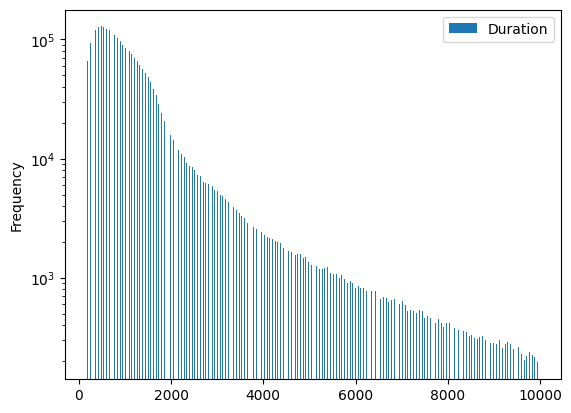

In [53]:
spring_df_f = spring_df_f.toPandas()
spring_df_f['Duration'] = spring_df_f['Duration'].astype(int)
spring_df_f.plot(kind="hist", bins=500, log=True)
plt.show()

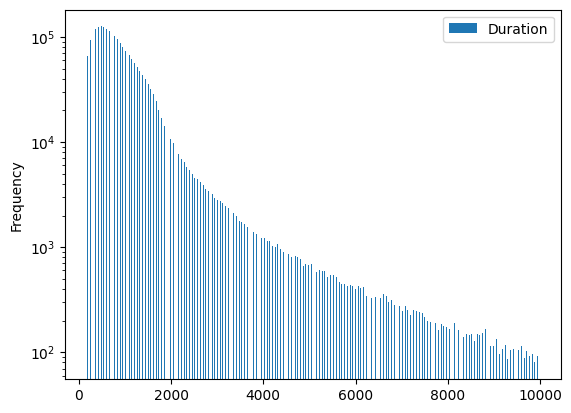

In [54]:
autumn_df_f = autumn_df_f.toPandas()
autumn_df_f['Duration'] = autumn_df_f['Duration'].astype(int)
autumn_df_f.plot(kind="hist", bins=500, log=True)
plt.show()

#  **5.** *Evaluate the final data*

## A. Calculate Total Duration

In [55]:
# Calculate the sum of the duration column
total_duration_spring = spring_df_f['Duration'].sum()

print(total_duration_spring)

3000639420


In [56]:
spring_df_f.count()

Duration    2626339
dtype: int64

In [57]:
# Calculate the sum of the duration column
total_duration_autumn = autumn_df_f['Duration'].sum()

print(total_duration_autumn)

2221277700


In [58]:
autumn_df_f.count()

Duration    2257128
dtype: int64

## B. Calculate Average Duration

In [59]:
Average_Autumn= total_duration_autumn/ autumn_df_f.count()
Average_Autumn

Duration    984.116851
dtype: float64

In [60]:
Average_Spring= total_duration_spring/ spring_df_f.count()
Average_Spring

Duration    1142.517938
dtype: float64

In [61]:
#we can observe that, on average, the duration of bike rides in Autumn (984.116851) is shorter than the duration in Spring (1142.517938). 
#The difference in averages indicates that bike rides tend to be longer during Spring compared to Autumn.

## C. Calculate Mean Difference

In [62]:
mean_difference = total_duration_autumn - total_duration_spring
print("Mean Difference:", mean_difference)

Mean Difference: -779361720


In [63]:
#According to the mean difference of -779361720, the total duration of bike rides in Autumn is 544,098,960 units less than the total duration of bike rides in Spring.

## D. Calculate Percentage Difference

In [64]:
percentage_difference = ((total_duration_spring - total_duration_autumn) / total_duration_autumn) * 100
print("Percentage Difference:", percentage_difference)

Percentage Difference: 35.086190258876684


In [65]:
#Based on the calculated percentage difference of 35.08%, the total duration of Autumn bike rides is approximately 35.08% less than the total duration of Spring bike rides.

# 6: Statistical Hypothesis Testing

In [66]:
#Hypothesis : In 2014, people ride for longer in Autumn than in Spring
#Null Hypothesis (H0): In 2014, people rode for longer in the autumn than in the spring.
#Alternative Hypothesis (H1): In 2014, people do not ride for as long in the autumn as they do in the spring.

In [67]:
# Perform a t-test to determine if the difference in average durations is statistically significant
t_statistic, p_value = stats.ttest_ind(autumn_df_f['Duration'], spring_df_f['Duration'])
t_statistic

-173.48207751015985

In [68]:
p_value

0.0

In [69]:
# Analyze the results and draw conclusions based on the statistical significance
if p_value < 0.05:  # Assuming a significance level of 0.05
    print("There is evidence to reject the null hypothesis.")
    print("In 2014, people don't ride for longer in Autumn than in Spring.")
else:
    print("There is not enough evidence to reject the null hypothesis.")
    print("In 2014, people ride for longer in Autumn than in Spring.")

There is evidence to reject the null hypothesis.
In 2014, people don't ride for longer in Autumn than in Spring.


In [70]:
#Based on the t-statistic and the extremely small p-value, we can reject the null hypothesis. The evidence suggests that people don't ride for longer in Autumn than in Spring in 2014.
# Therefore, the alternative hypothesis is supported, indicating that there is a statistically significant difference in the average duration of bike rides between Autumn and Spring in 2014.

In [71]:
effect_size, _ = stats.ttest_ind(autumn_df_f['Duration'], spring_df_f['Duration'])
print("Effect Size (Cohen's d):", effect_size)

Effect Size (Cohen's d): -173.48207751015985


In [72]:
#Cohen's d is a standardized measure of effect size, where a larger absolute value indicates a stronger effect. In this case, the large negative Cohen's d value indicates a substantial difference between the two seasons in terms of bike ride durations.
#A negative effect size suggests that there is a large difference in the average durations of bike rides between Autumn and Spring, with Autumn having significantly shorter durations compared to Spring.

# **7.** *Conclusion*

Based on the results of all visualizations, Mean Difference, Percentage Difference, Average Difference, Hypothseis T Test and Cohen's d , it is proved that the 1st Hypothesis " In 2014, people ride
for longer in Autumn than in Spring " is False.  i.e., People ride longer in SPRING than in AUTUMN